In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import itertools
import logging
import matplotlib.pyplot as plt
import pandas as pd
import torch.utils.data as utils
import math
import time
import tqdm

import torch
import torch.optim as optim
import torch.nn.functional as F
from argparse import ArgumentParser
from torch.distributions import MultivariateNormal

import torch.nn as nn
import torch.nn.init as init

In [2]:
f_BB2 = pd.read_hdf("/data/t3home000/spark/QUASAR/preprocessing/conventional_tau_BB2.h5")


In [133]:
bkg0 = np.load('../data_strings/bkgae_rndbkg_loss_bb2.npy')
bkg1 = np.load('../data_strings/bkgae_purebkg_loss_bb2.npy')
sig0 = np.load('../data_strings/sigae_2prong_Cwola_loss_bb2.npy')
sig1 = np.load('../data_strings/sigae_3prong_loss_bb2.npy')

In [134]:
len(bkg0)

999999

In [135]:
len(sig0)

999999

In [136]:
dt = f_BB2.values
correct = (dt[:,3]>0) &(dt[:,19]>0)
dt = dt[correct]
for i in range(13,19):
    dt[:,i] = dt[:,i]/dt[:,3]
    
for i in range(29,35):
     dt[:,i] = dt[:,i]/(dt[:,19])
        
        
correct = (dt[:,29]>=0) &(dt[:,29]<=1)&(dt[:,30]>=0) &(dt[:,30]<=1)&(dt[:,31]>=0) &(dt[:,31]<=1)&(dt[:,32]>=0) &(dt[:,32]<=1)&(dt[:,33]>=0) &(dt[:,33]<=1)&(dt[:,34]>=-0.01) &(dt[:,34]<=1)
dt = dt[correct]
bkg0=bkg0[correct]
sig0=sig0[correct]
#Y = dt[:,[3,4,5,6,11,12,13,14,15,16,17,18,19,20,21,22,27,28,29,30,31,32,33,34]]

In [137]:
dt.shape

(902602, 35)

(array([ 34877., 107067.,  89331.,  59154.,  46504.,  45414.,  49810.,
         61832., 102534., 306079.]),
 array([-1.26573706e-06,  9.99988608e-02,  1.99998987e-01,  2.99999114e-01,
         3.99999241e-01,  4.99999367e-01,  5.99999494e-01,  6.99999620e-01,
         7.99999747e-01,  8.99999873e-01,  1.00000000e+00]),
 <a list of 10 Patch objects>)

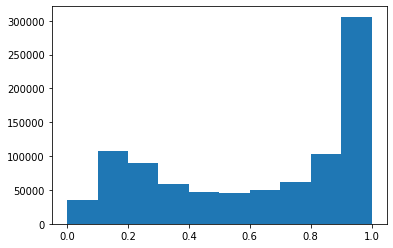

In [33]:
plt.hist(dt[:,14])

In [225]:
selection = np.where((dt[:,13]>0.9) & (bkg0>1.4) & (bkg1>1.8) & (dt[:,14]>0.9) & (sig0<4) & (sig1<3))[0]

In [226]:
len(selection)

31

(array([0., 3., 3., 1., 2., 1., 2., 3., 3., 0., 0., 1., 1., 2., 0., 3., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([2800.        , 2944.82758621, 3089.65517241, 3234.48275862,
        3379.31034483, 3524.13793103, 3668.96551724, 3813.79310345,
        3958.62068966, 4103.44827586, 4248.27586207, 4393.10344828,
        4537.93103448, 4682.75862069, 4827.5862069 , 4972.4137931 ,
        5117.24137931, 5262.06896552, 5406.89655172, 5551.72413793,
        5696.55172414, 5841.37931034, 5986.20689655, 6131.03448276,
        6275.86206897, 6420.68965517, 6565.51724138, 6710.34482759,
        6855.17241379, 7000.        ]),
 <a list of 29 Patch objects>)

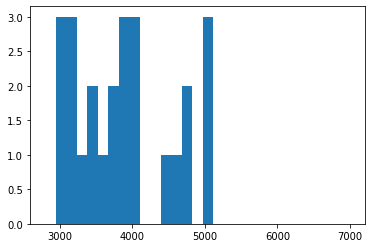

In [228]:
plt.hist(dt[selection,0],bins=np.linspace(2800,7000,30))